In [1]:
from pathlib import Path

import numpy as np
import matplotlib.pyplot as plt

import torch

In [2]:
import os, sys
sys.path.append(os.path.abspath('..'))

from src.metrics_acdc import load_nii
from src.data.cine2gridtag import sim_gridtag, mod_contrast

from src.data.data_utils import Patient
from src.data.datasets import ACDCDataset

In [3]:
acdc_filepath = Path('/Users/adhaene/development/stanford/acdc-training')

example = acdc_filepath / 'patient001' / 'patient001_frame01.nii.gz'
example_gt = acdc_filepath / 'patient001' / 'patient001_frame01_gt.nii.gz'

In [4]:
imt, _, _ = load_nii(example)
gt, _, _ = load_nii(example_gt)

In [5]:
# fig, ax = plt.subplots(10, 3, figsize=(15, 30))

# for i in range(10):
#     ax[i, 0].imshow(imt[:, :, i], cmap='gray')
#     ax[i, 1].imshow(gt[:, :, i])
#     ax[i, 2].imshow(sim_gridtag(imt[:, :, i] ** 0.4, 5), cmap='gray')

In [6]:
p = Patient(acdc_filepath / 'patient001')

In [10]:
dataset = ACDCDataset(acdc_filepath, verbose=1)

Loaded saved dataset from /Users/adhaene/development/stanford/tagroi/checkpoints/acdc_dataset.pt


In [11]:
len(dataset)

952

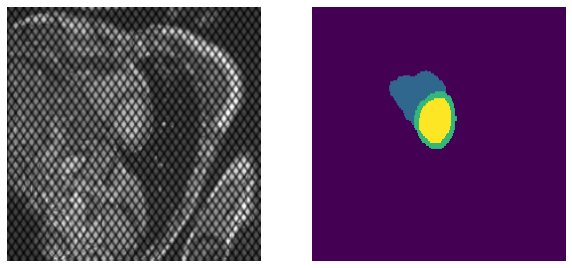

In [13]:
fix, ax = plt.subplots(1, 2, figsize=(10, 5))

ax[0].imshow(dataset[212][0][0, ...], cmap='gray'), ax[0].axis('off')
ax[1].imshow(dataset[212][1][...]), ax[1].axis('off')

plt.show()